<div dir="rtl" width="100%">

# למידת מכונה/אינטיליגנציה מלאכותית  - המדריך הפרקטי
--------------------------------------
# 1. מבוא

## לפני שמתחילים
##### לפני שנתחיל, כמה כלים שיעזרו לנו: מחברת פייטון הידועה גם בשם מחברת jupyter (זו אינה שגיאת כתיב), סביבת עבודה בענן בה נוכל לפתח בלי להתקין כלום, וכמובן שפת פייטון השפה דה פקטו לכתוב קוד למידת מכונה 

### א. קיצורים
##### בהרבה מקומות נשתמש בקיצורים הבאים: ML - Machine Learninf (למידת מכונה) ו AI - Artificial Inteligence (אינטיליגציה מלאכותית)

### ב. IPython ( jupyter) notebook
##### אם תגללו למטה תראו שדף זה בנוי משני סוגי תאים - תאים של טקסט (נקרא markdown) ותאים של קוד פייטון. מחברת פיטון כזאת מקובלת בהרבה אתרים העוסקים בלמידת מכונה
### ג. סביבת פיתוח בענן
##### בכדי לפתח נצטרך סביבת עבודה, לשימחתנו [גוגל מספקים אחת כזאת ](https://colab.research.google.com/ "goole colab") בענן ו[דוגמאות](https://github.com/tensorflow/workshops)  עם שמירה ב google-docs ואפילו מאפשרים האצה בGPU.

### ד. TensorFlow ( או TF)
##### זוהי ספריית פייטון מבית גוגל (קוד פתוח), המיועדת ללמידת מכונה ובעיקר רשתות ניורונים. היא מתחילה מבסיס שהוא ה"אסמבלי" של ML ומכילה רמות גבוהות יותר כמו Keras המקבילה לשפה עילית. נפגוש אותה בהמשך

### ה. שפת Python
##### אני לא אכנס פה ללימוד שפת פייטון, אני מניח שאדם שתכנת בשפה זו או אחרת יוכל להבין וללמוד תוך כדי. בנוסף ישנם באינטרנט אין ספור מדריכים לפייטון
##### למי שמגיע משפת תכנות אחרת, אציין שהדבר ה"מוזר" בפייטון הינו שאם בשפות אחרות אינדנטציה היא בשביל קריאות הקוד ואינה משפיעה על פעולתו, בפיטון אינדנטציה היא חובה.
##### שימו לב להבדל בין:

</div >

In [1]:
for i in range(5):
    print(i)
    print("good night")

0
good night
1
good night
2
good night
3
good night
4
good night


<div dir="rtl">

##### לבין:

</div >

In [2]:
for i in range(5):
    print(i)
print("good night")

0
1
2
3
4
good night


<div dir="rtl">

##### טוב, אנחנו מוכנים, אז נתחיל

# רגרסיה ליניארית
##### נייצר לנו נתונים (ונלמד קצת פייטון בדרך):
##### נתחיל בייבוא הספריות אותם אנו צריכים:
</div >

In [3]:
import matplotlib.pyplot as plt # for graphs
import numpy as np # for calculations

<div dir="rtl">

##### נגדיר פונקציה בשם gen_data שתייצר לנו את הנתונים. שימו לב שאנחנו מייצרים קו ישר שמוגדר ע"י השיפוע M ונקודת החיתוך עם ציר ה Y - שהיא N:
</div >

In [4]:
def gen_data():
    x=np.arange(10.0) # x=[0.0, 1.0, ... , 9.0] - 10 numbers
    print("x=",x)

    M=-0.7 # slope
    N=1.1 # y-axis intersect
    print("M=",M)
    print("N=",N)

    y=x*M+N
    print("y=",y)
    return x,y



<div dir="rtl">

##### נריץ את gen_data ונשמור את הערכים שמחזירה לתוך a  ו b:

</div >

In [5]:
print("printed output of gen_data:")
a,b=gen_data()

print("")
print("after gen_data")
print("a is:")
a # this will be shown as Out[]: array ...

printed output of gen_data:
x= [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
M= -0.7
N= 1.1
y= [ 1.1  0.4 -0.3 -1.  -1.7 -2.4 -3.1 -3.8 -4.5 -5.2]

after gen_data
a is:


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

<div dir="rtl">

##### שימו לב שהמשתנים בתוך הפונקציה x,y,m,n אינם נגישים בחוץ, ואילו בחוץ ישנם המשתנים a ו b (נתתי שמות שונים בכוונה להמחיש את ההבדל)
##### עכשיו נציג את a ו b בגרף בעזרת הפונקציה שיצרנו קודם - plot_data

</div >

<div dir="rtl">


##### נגדיר פונקציה בשם plot_data שתצייר לנו את הנתונים:

</div >

In [6]:
def plot_data(x,y,flags='o',title='A Graph',y2=[],flags2="ro"):
    if (len(y2)):
        plt.plot(x, y,flags,x,y2,flags2) # 2 graphs
    else:
        plt.plot(x, y,flags) # 1 graph
    plt.xlabel('X - axis')
    plt.ylabel('Y - axis')
    plt.title(title)
    plt.grid(True)
    #plt.savefig("test.png")
    plt.show()
    


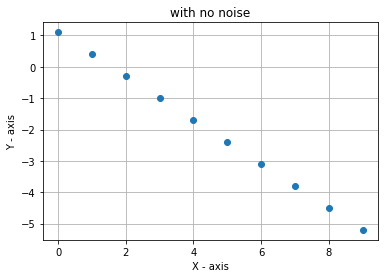

In [7]:
plot_data(a,b,title='with no noise')

<div dir="rtl">



##### נוסיף קצת רעש ונצייר שוב:

</div >

b= [ 1.1  0.4 -0.3 -1.  -1.7 -2.4 -3.1 -3.8 -4.5 -5.2]
noise= [-0.1176778  -0.06097515 -0.99916201  0.17915376  0.54777678  0.1319569
  0.33983816 -0.70402693 -0.40872584  0.91372778]
b+noise= [ 0.9823222   0.33902485 -1.29916201 -0.82084624 -1.15222322 -2.2680431
 -2.76016184 -4.50402693 -4.90872584 -4.28627222]


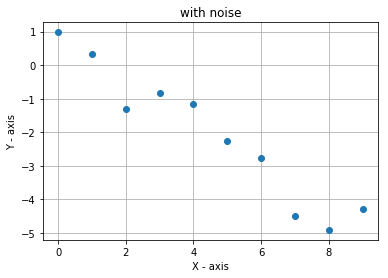

In [8]:
noise=np.random.random(len(b)) # retruns array of values between 0.0 and 1.0
noise=(noise-0.5) # now is array in range -0.5 to 0.5
noise=noise*2 # now is array in range -1 to 1

print("b=",b)
print("noise=",noise)
b_with_noise=b+noise
print("b+noise=",b_with_noise)

plot_data(a,b_with_noise,title='with noise')


<div dir="rtl">



##### , נלמד קצת על TensorFlow לפני שנשתמש ברגרסיה ליניארית לנסות לשחזר לנו את הקו המקורי:

</div >

<div dir="rtl">

# TensorFlow

##### בסיס: ב TensorFlow אנחנו מגדירים קודם את הבעיה בלי לפתור אותה ורק אח"כ מחשבים. לדוגמא:
</div >

In [9]:
import tensorflow as tf

#define problem 2.0*3.0

#c1=2.0
c1 = tf.constant(2.0)

#c2=3.0
c2 = tf.constant(3.0)


#mul1=c1*c2
mul1 = c1 * c2

# Start tf session
sess = tf.Session()


print("c1 is ",c1,"with value ",sess.run(c1))
print("c2 is ",c2,"with value ",sess.run(c2))
print("mul1 is ",mul1)
  

    
# solve to problem
res=sess.run(mul1)
print("res:",res)

#close the session
sess.close();


c1 is  Tensor("Const:0", shape=(), dtype=float32) with value  2.0
c2 is  Tensor("Const_1:0", shape=(), dtype=float32) with value  3.0
mul1 is  Tensor("mul:0", shape=(), dtype=float32)
res: 6.0


<div dir="rtl">


##### להרחבה ניתן לצפות [בסרטון הבא](https://www.youtube.com/watch?v=yX8KuPZCAMo) (באנגלית)

#### בחזרה לרגרסיה הליניארית:
##### אנחנו רוצים למצוא את M ו N. קודם נגדיר אותם כ Variables ונאתחל אותם לערך כלשהו לדוגמא 0.5, יותר מאוחר נמצא את הערכים שלהם

</div >

In [10]:
M=tf.Variable([0.5],tf.float32)
N=tf.Variable([0.5],tf.float32)

<div dir="rtl">

##### נגדיר מקום להכניס את הנתונים שיצרנו קודם ונקרא להם X ו Y (רק נגדיר מקום. את הנתונים נכניס אח"כ)
</div >

In [11]:
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

<div dir="rtl">

##### נחשב את הקו הישר Calculated_Y ואת LOSS - הטעות בין Calculated_Y  שחישבנו מהנתונים לנתונים עצמם:
</div >

In [12]:
Calculated_Y=X*M+N

loss_vector=Y-Calculated_Y
loss=tf.reduce_sum(tf.square(loss_vector)) # sum of square of delta Y.

<div dir="rtl">

##### נאתחל את המשתנים הגלובליים:
</div >

In [13]:
init=tf.global_variables_initializer()

<div dir="rtl">

##### נבחר באופטימייזר מסוג gardient descent (לא נרחיב עליו עכשיו) עם מקדם קפיצה של 0.002 ונבקש ממנו לנסות להקטין את LOSS למינימום:
</div >

In [14]:
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

<div dir="rtl">

##### נריץ 10 איטרציות בהם האופטימיזר ינסה לתקן את M ו N בכדי להקטין את ריבועי מרחקי הנקודות מהקו
</div >

In [15]:
with tf.Session() as sess: # auto close the session 
    sess.run(init)
    iterations=5000
    for i in range(iterations): #run iterations
        print("running batch %d/%d:" % (i+1,iterations))
        sess.run(train,{ X:a,Y:b_with_noise}); #optimize with x taken from a, and y taken from b+noise
        #print("  Estimated M=",sess.run(M))
        #print("  Estimated N=",sess.run(N))
    m_res=sess.run(M)
    n_res=sess.run(N)
            

running batch 1/5000:
running batch 2/5000:
running batch 3/5000:
running batch 4/5000:
running batch 5/5000:
running batch 6/5000:
running batch 7/5000:
running batch 8/5000:
running batch 9/5000:
running batch 10/5000:
running batch 11/5000:
running batch 12/5000:
running batch 13/5000:
running batch 14/5000:
running batch 15/5000:
running batch 16/5000:
running batch 17/5000:
running batch 18/5000:
running batch 19/5000:
running batch 20/5000:
running batch 21/5000:
running batch 22/5000:
running batch 23/5000:
running batch 24/5000:
running batch 25/5000:
running batch 26/5000:
running batch 27/5000:
running batch 28/5000:
running batch 29/5000:
running batch 30/5000:
running batch 31/5000:
running batch 32/5000:
running batch 33/5000:
running batch 34/5000:
running batch 35/5000:
running batch 36/5000:
running batch 37/5000:
running batch 38/5000:
running batch 39/5000:
running batch 40/5000:
running batch 41/5000:
running batch 42/5000:
running batch 43/5000:
running batch 44/500

running batch 533/5000:
running batch 534/5000:
running batch 535/5000:
running batch 536/5000:
running batch 537/5000:
running batch 538/5000:
running batch 539/5000:
running batch 540/5000:
running batch 541/5000:
running batch 542/5000:
running batch 543/5000:
running batch 544/5000:
running batch 545/5000:
running batch 546/5000:
running batch 547/5000:
running batch 548/5000:
running batch 549/5000:
running batch 550/5000:
running batch 551/5000:
running batch 552/5000:
running batch 553/5000:
running batch 554/5000:
running batch 555/5000:
running batch 556/5000:
running batch 557/5000:
running batch 558/5000:
running batch 559/5000:
running batch 560/5000:
running batch 561/5000:
running batch 562/5000:
running batch 563/5000:
running batch 564/5000:
running batch 565/5000:
running batch 566/5000:
running batch 567/5000:
running batch 568/5000:
running batch 569/5000:
running batch 570/5000:
running batch 571/5000:
running batch 572/5000:
running batch 573/5000:
running batch 57

running batch 909/5000:
running batch 910/5000:
running batch 911/5000:
running batch 912/5000:
running batch 913/5000:
running batch 914/5000:
running batch 915/5000:
running batch 916/5000:
running batch 917/5000:
running batch 918/5000:
running batch 919/5000:
running batch 920/5000:
running batch 921/5000:
running batch 922/5000:
running batch 923/5000:
running batch 924/5000:
running batch 925/5000:
running batch 926/5000:
running batch 927/5000:
running batch 928/5000:
running batch 929/5000:
running batch 930/5000:
running batch 931/5000:
running batch 932/5000:
running batch 933/5000:
running batch 934/5000:
running batch 935/5000:
running batch 936/5000:
running batch 937/5000:
running batch 938/5000:
running batch 939/5000:
running batch 940/5000:
running batch 941/5000:
running batch 942/5000:
running batch 943/5000:
running batch 944/5000:
running batch 945/5000:
running batch 946/5000:
running batch 947/5000:
running batch 948/5000:
running batch 949/5000:
running batch 95

running batch 1328/5000:
running batch 1329/5000:
running batch 1330/5000:
running batch 1331/5000:
running batch 1332/5000:
running batch 1333/5000:
running batch 1334/5000:
running batch 1335/5000:
running batch 1336/5000:
running batch 1337/5000:
running batch 1338/5000:
running batch 1339/5000:
running batch 1340/5000:
running batch 1341/5000:
running batch 1342/5000:
running batch 1343/5000:
running batch 1344/5000:
running batch 1345/5000:
running batch 1346/5000:
running batch 1347/5000:
running batch 1348/5000:
running batch 1349/5000:
running batch 1350/5000:
running batch 1351/5000:
running batch 1352/5000:
running batch 1353/5000:
running batch 1354/5000:
running batch 1355/5000:
running batch 1356/5000:
running batch 1357/5000:
running batch 1358/5000:
running batch 1359/5000:
running batch 1360/5000:
running batch 1361/5000:
running batch 1362/5000:
running batch 1363/5000:
running batch 1364/5000:
running batch 1365/5000:
running batch 1366/5000:
running batch 1367/5000:


running batch 1726/5000:
running batch 1727/5000:
running batch 1728/5000:
running batch 1729/5000:
running batch 1730/5000:
running batch 1731/5000:
running batch 1732/5000:
running batch 1733/5000:
running batch 1734/5000:
running batch 1735/5000:
running batch 1736/5000:
running batch 1737/5000:
running batch 1738/5000:
running batch 1739/5000:
running batch 1740/5000:
running batch 1741/5000:
running batch 1742/5000:
running batch 1743/5000:
running batch 1744/5000:
running batch 1745/5000:
running batch 1746/5000:
running batch 1747/5000:
running batch 1748/5000:
running batch 1749/5000:
running batch 1750/5000:
running batch 1751/5000:
running batch 1752/5000:
running batch 1753/5000:
running batch 1754/5000:
running batch 1755/5000:
running batch 1756/5000:
running batch 1757/5000:
running batch 1758/5000:
running batch 1759/5000:
running batch 1760/5000:
running batch 1761/5000:
running batch 1762/5000:
running batch 1763/5000:
running batch 1764/5000:
running batch 1765/5000:


running batch 2124/5000:
running batch 2125/5000:
running batch 2126/5000:
running batch 2127/5000:
running batch 2128/5000:
running batch 2129/5000:
running batch 2130/5000:
running batch 2131/5000:
running batch 2132/5000:
running batch 2133/5000:
running batch 2134/5000:
running batch 2135/5000:
running batch 2136/5000:
running batch 2137/5000:
running batch 2138/5000:
running batch 2139/5000:
running batch 2140/5000:
running batch 2141/5000:
running batch 2142/5000:
running batch 2143/5000:
running batch 2144/5000:
running batch 2145/5000:
running batch 2146/5000:
running batch 2147/5000:
running batch 2148/5000:
running batch 2149/5000:
running batch 2150/5000:
running batch 2151/5000:
running batch 2152/5000:
running batch 2153/5000:
running batch 2154/5000:
running batch 2155/5000:
running batch 2156/5000:
running batch 2157/5000:
running batch 2158/5000:
running batch 2159/5000:
running batch 2160/5000:
running batch 2161/5000:
running batch 2162/5000:
running batch 2163/5000:


running batch 2536/5000:
running batch 2537/5000:
running batch 2538/5000:
running batch 2539/5000:
running batch 2540/5000:
running batch 2541/5000:
running batch 2542/5000:
running batch 2543/5000:
running batch 2544/5000:
running batch 2545/5000:
running batch 2546/5000:
running batch 2547/5000:
running batch 2548/5000:
running batch 2549/5000:
running batch 2550/5000:
running batch 2551/5000:
running batch 2552/5000:
running batch 2553/5000:
running batch 2554/5000:
running batch 2555/5000:
running batch 2556/5000:
running batch 2557/5000:
running batch 2558/5000:
running batch 2559/5000:
running batch 2560/5000:
running batch 2561/5000:
running batch 2562/5000:
running batch 2563/5000:
running batch 2564/5000:
running batch 2565/5000:
running batch 2566/5000:
running batch 2567/5000:
running batch 2568/5000:
running batch 2569/5000:
running batch 2570/5000:
running batch 2571/5000:
running batch 2572/5000:
running batch 2573/5000:
running batch 2574/5000:
running batch 2575/5000:


running batch 2926/5000:
running batch 2927/5000:
running batch 2928/5000:
running batch 2929/5000:
running batch 2930/5000:
running batch 2931/5000:
running batch 2932/5000:
running batch 2933/5000:
running batch 2934/5000:
running batch 2935/5000:
running batch 2936/5000:
running batch 2937/5000:
running batch 2938/5000:
running batch 2939/5000:
running batch 2940/5000:
running batch 2941/5000:
running batch 2942/5000:
running batch 2943/5000:
running batch 2944/5000:
running batch 2945/5000:
running batch 2946/5000:
running batch 2947/5000:
running batch 2948/5000:
running batch 2949/5000:
running batch 2950/5000:
running batch 2951/5000:
running batch 2952/5000:
running batch 2953/5000:
running batch 2954/5000:
running batch 2955/5000:
running batch 2956/5000:
running batch 2957/5000:
running batch 2958/5000:
running batch 2959/5000:
running batch 2960/5000:
running batch 2961/5000:
running batch 2962/5000:
running batch 2963/5000:
running batch 2964/5000:
running batch 2965/5000:


running batch 3345/5000:
running batch 3346/5000:
running batch 3347/5000:
running batch 3348/5000:
running batch 3349/5000:
running batch 3350/5000:
running batch 3351/5000:
running batch 3352/5000:
running batch 3353/5000:
running batch 3354/5000:
running batch 3355/5000:
running batch 3356/5000:
running batch 3357/5000:
running batch 3358/5000:
running batch 3359/5000:
running batch 3360/5000:
running batch 3361/5000:
running batch 3362/5000:
running batch 3363/5000:
running batch 3364/5000:
running batch 3365/5000:
running batch 3366/5000:
running batch 3367/5000:
running batch 3368/5000:
running batch 3369/5000:
running batch 3370/5000:
running batch 3371/5000:
running batch 3372/5000:
running batch 3373/5000:
running batch 3374/5000:
running batch 3375/5000:
running batch 3376/5000:
running batch 3377/5000:
running batch 3378/5000:
running batch 3379/5000:
running batch 3380/5000:
running batch 3381/5000:
running batch 3382/5000:
running batch 3383/5000:
running batch 3384/5000:


running batch 3719/5000:
running batch 3720/5000:
running batch 3721/5000:
running batch 3722/5000:
running batch 3723/5000:
running batch 3724/5000:
running batch 3725/5000:
running batch 3726/5000:
running batch 3727/5000:
running batch 3728/5000:
running batch 3729/5000:
running batch 3730/5000:
running batch 3731/5000:
running batch 3732/5000:
running batch 3733/5000:
running batch 3734/5000:
running batch 3735/5000:
running batch 3736/5000:
running batch 3737/5000:
running batch 3738/5000:
running batch 3739/5000:
running batch 3740/5000:
running batch 3741/5000:
running batch 3742/5000:
running batch 3743/5000:
running batch 3744/5000:
running batch 3745/5000:
running batch 3746/5000:
running batch 3747/5000:
running batch 3748/5000:
running batch 3749/5000:
running batch 3750/5000:
running batch 3751/5000:
running batch 3752/5000:
running batch 3753/5000:
running batch 3754/5000:
running batch 3755/5000:
running batch 3756/5000:
running batch 3757/5000:
running batch 3758/5000:


running batch 4091/5000:
running batch 4092/5000:
running batch 4093/5000:
running batch 4094/5000:
running batch 4095/5000:
running batch 4096/5000:
running batch 4097/5000:
running batch 4098/5000:
running batch 4099/5000:
running batch 4100/5000:
running batch 4101/5000:
running batch 4102/5000:
running batch 4103/5000:
running batch 4104/5000:
running batch 4105/5000:
running batch 4106/5000:
running batch 4107/5000:
running batch 4108/5000:
running batch 4109/5000:
running batch 4110/5000:
running batch 4111/5000:
running batch 4112/5000:
running batch 4113/5000:
running batch 4114/5000:
running batch 4115/5000:
running batch 4116/5000:
running batch 4117/5000:
running batch 4118/5000:
running batch 4119/5000:
running batch 4120/5000:
running batch 4121/5000:
running batch 4122/5000:
running batch 4123/5000:
running batch 4124/5000:
running batch 4125/5000:
running batch 4126/5000:
running batch 4127/5000:
running batch 4128/5000:
running batch 4129/5000:
running batch 4130/5000:


running batch 4468/5000:
running batch 4469/5000:
running batch 4470/5000:
running batch 4471/5000:
running batch 4472/5000:
running batch 4473/5000:
running batch 4474/5000:
running batch 4475/5000:
running batch 4476/5000:
running batch 4477/5000:
running batch 4478/5000:
running batch 4479/5000:
running batch 4480/5000:
running batch 4481/5000:
running batch 4482/5000:
running batch 4483/5000:
running batch 4484/5000:
running batch 4485/5000:
running batch 4486/5000:
running batch 4487/5000:
running batch 4488/5000:
running batch 4489/5000:
running batch 4490/5000:
running batch 4491/5000:
running batch 4492/5000:
running batch 4493/5000:
running batch 4494/5000:
running batch 4495/5000:
running batch 4496/5000:
running batch 4497/5000:
running batch 4498/5000:
running batch 4499/5000:
running batch 4500/5000:
running batch 4501/5000:
running batch 4502/5000:
running batch 4503/5000:
running batch 4504/5000:
running batch 4505/5000:
running batch 4506/5000:
running batch 4507/5000:


running batch 4825/5000:
running batch 4826/5000:
running batch 4827/5000:
running batch 4828/5000:
running batch 4829/5000:
running batch 4830/5000:
running batch 4831/5000:
running batch 4832/5000:
running batch 4833/5000:
running batch 4834/5000:
running batch 4835/5000:
running batch 4836/5000:
running batch 4837/5000:
running batch 4838/5000:
running batch 4839/5000:
running batch 4840/5000:
running batch 4841/5000:
running batch 4842/5000:
running batch 4843/5000:
running batch 4844/5000:
running batch 4845/5000:
running batch 4846/5000:
running batch 4847/5000:
running batch 4848/5000:
running batch 4849/5000:
running batch 4850/5000:
running batch 4851/5000:
running batch 4852/5000:
running batch 4853/5000:
running batch 4854/5000:
running batch 4855/5000:
running batch 4856/5000:
running batch 4857/5000:
running batch 4858/5000:
running batch 4859/5000:
running batch 4860/5000:
running batch 4861/5000:
running batch 4862/5000:
running batch 4863/5000:
running batch 4864/5000:


<div dir="rtl">

##### נצייר את הקו עבור ה M ו ה N שקיבלנו באדום ואת המקורי בכחול:
</div >

calculated M,N: [-0.6491487] [0.85335624]
new_y= [ 0.85335624  0.20420754 -0.44494116 -1.09408987 -1.74323857 -2.39238727
 -3.04153597 -3.69068468 -4.33983338 -4.98898208]


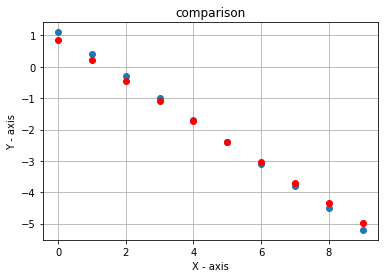

In [16]:
print("calculated M,N:",m_res,n_res)
new_y=m_res*a+n_res;
print("new_y=",new_y)
plot_data(a,b,y2=new_y,title='comparison')

<div dir="rtl">

##### ניתן לראות שלמרות הרעש שהכנסנו, הצלחנו לשערך לא רע את הקו המקורי:
</div >